**To Predict the fare amount of future rides using regression analysis**

**Importing Important Libraries**

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

**Reading Dataset using pandas function read_csv**

In [5]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\uber.csv")
z

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
z.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
z.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


**Count number of null values present in dataset**

In [9]:
z.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

**Dropping unnamed column from dataset**

In [11]:
z.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [12]:
for i in z:
    z = z[z[i].notna()]
z

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


**Shape of dataset**

In [14]:
z.shape

(199999, 8)

**Size of dataset**

In [16]:
z.size

1599992

In [17]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


**Number of Dimension of dataset**

In [19]:
z.ndim

2

**Datatype of respective columns**

In [21]:
z.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

**Bivariate analysis**

**Plotting barplot between pickup_datetime and fare_amount**

<Axes: xlabel='pickup_datetime', ylabel='fare_amount'>

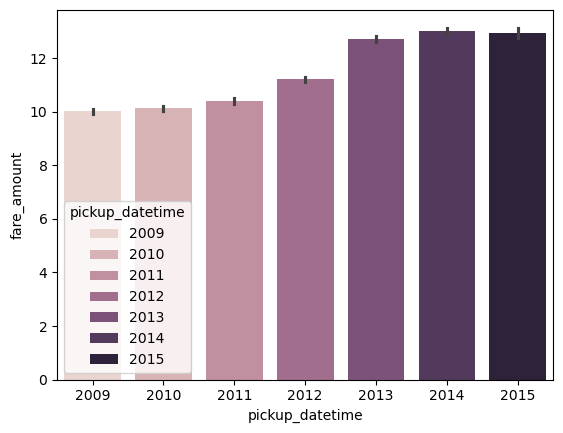

In [24]:
sns.barplot(x = pd.DatetimeIndex(z["pickup_datetime"]).year, y = z["fare_amount"], data = z, hue = pd.DatetimeIndex(z["pickup_datetime"]).year)

**Plotting barplot between pickup_datetime and passenger_count**

<Axes: xlabel='pickup_datetime', ylabel='passenger_count'>

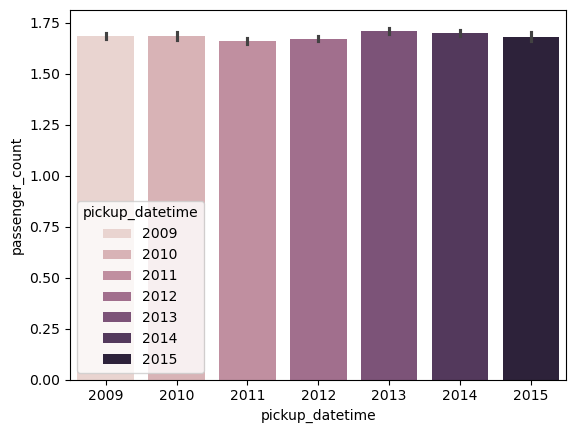

In [26]:
sns.barplot(x = pd.DatetimeIndex(z["pickup_datetime"]).year, y = z["passenger_count"], data = z, hue = pd.DatetimeIndex(z["pickup_datetime"]).year)

**Correlation Coffiecient**

In [28]:
b = z.copy()
for i in b:
    if(b[i].dtype == "object"):
        b.drop([i], axis = 1, inplace = True)
b

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [29]:
b.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


**Separating independent and dependent varaible from dataset**

In [31]:
X = b.copy()
X.drop(["fare_amount"], axis = 1, inplace = True)
Y = b["fare_amount"]

**Principle Component Analysis**

In [33]:
from sklearn.decomposition import PCA

In [34]:
a = PCA()
x = a.fit_transform(X)
x.shape

(199999, 5)

**Model selection**

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
x_train.shape

(139999, 5)

In [38]:
x_test.shape

(60000, 5)

In [39]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [40]:
y_train.shape

(139999, 1)

In [41]:
y_test.shape

(60000, 1)

*Training model with training dataset*

In [43]:
n = RandomForestRegressor()
n.fit(x_train, y_train)

RandomForestRegressor()

**Evaluating Training dataset**

In [45]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [46]:
round(r2_train, 2)*100

94.0

**Testing model with testing dataset**

In [48]:
n = RandomForestRegressor()
n.fit(x_test, y_test)

RandomForestRegressor()

**Evaluating Testing dataset**

In [50]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [51]:
round(r2_test, 2)*100

93.0